# Pandas Challenges

#### Topic: Pandas (Exploring and visualizing our scraped movie data in pandas)

Just getting started? Read this guide: 10 minutes to pandas

#### Data: Your own data! But: if you don't have movie data to work on yet, you can use some data on the top grossing 100 movies from 2013, scraped from Box Office Mojo: 2013_movies.csv

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('2013_movies.csv', sep=',')
print(len(df))
df.head()

100


,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


## Challenge 1

Plot domestic total gross over time.

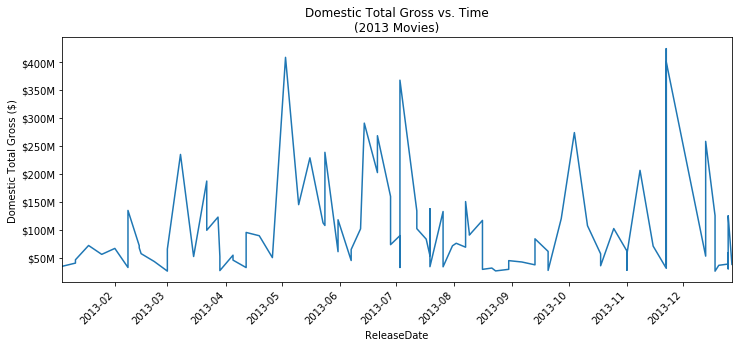

In [3]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df['DomesticTotalGross_mil'] = df['DomesticTotalGross']/1000000
df.plot('ReleaseDate', 'DomesticTotalGross_mil', ax=ax);
ax = plt.gca()
ax.set_ylabel('Domestic Total Gross ($)')
ax.legend_.remove()
ax.set_title('Domestic Total Gross vs. Time\n(2013 Movies)')

fmt = '${x:,.0f}M'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.setp( ax.xaxis.get_majorticklabels(), rotation=45 );

## Challenge 2

Plot runtime vs. domestic total gross.

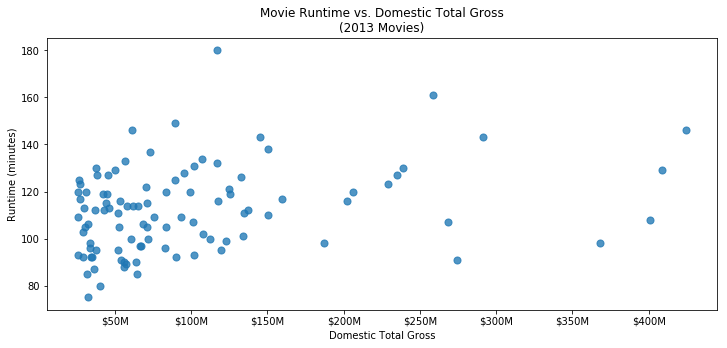

In [4]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
df.plot('DomesticTotalGross_mil', 'Runtime', ax=ax, kind='scatter', s=50, alpha=0.78);
ax = plt.gca()
ax.set_xlabel('Domestic Total Gross')
ax.set_ylabel('Runtime (minutes)')
ax.set_title('Movie Runtime vs. Domestic Total Gross\n(2013 Movies)')

fmt = '${x:,.0f}M'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 

# plt.setp( ax.xaxis.get_majorticklabels(), rotation=45 );

## Challenge 3

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

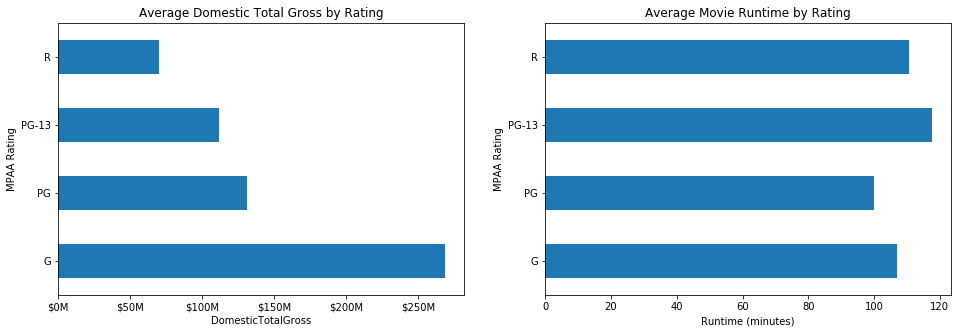

In [5]:
df_ratings = df.groupby('Rating').mean()[['DomesticTotalGross', 'Runtime', 'DomesticTotalGross_mil']]

fig, ax = plt.subplots(1,2, figsize=(16,5))

# Plot #1: Domestic Total Gross
df_ratings['DomesticTotalGross_mil'].plot(kind='barh', ax=ax[0])
fmt = '${x:,.0f}M'
tick = mtick.StrMethodFormatter(fmt)
ax[0].xaxis.set_major_formatter(tick) 
ax[0].set_xlabel('DomesticTotalGross')
ax[0].set_ylabel('MPAA Rating')
ax[0].set_title('Average Domestic Total Gross by Rating')

# Plot #2: Runtime
df_ratings['Runtime'].plot(kind='barh', ax=ax[1])
ax[1].set_xlabel('Runtime (minutes)')
ax[1].set_ylabel('MPAA Rating')
ax[1].set_title('Average Movie Runtime by Rating')

## Challenge 4

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_base.py:2917: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=735040.0, right=735040.0
  'left=%s, right=%s') % (left, right))


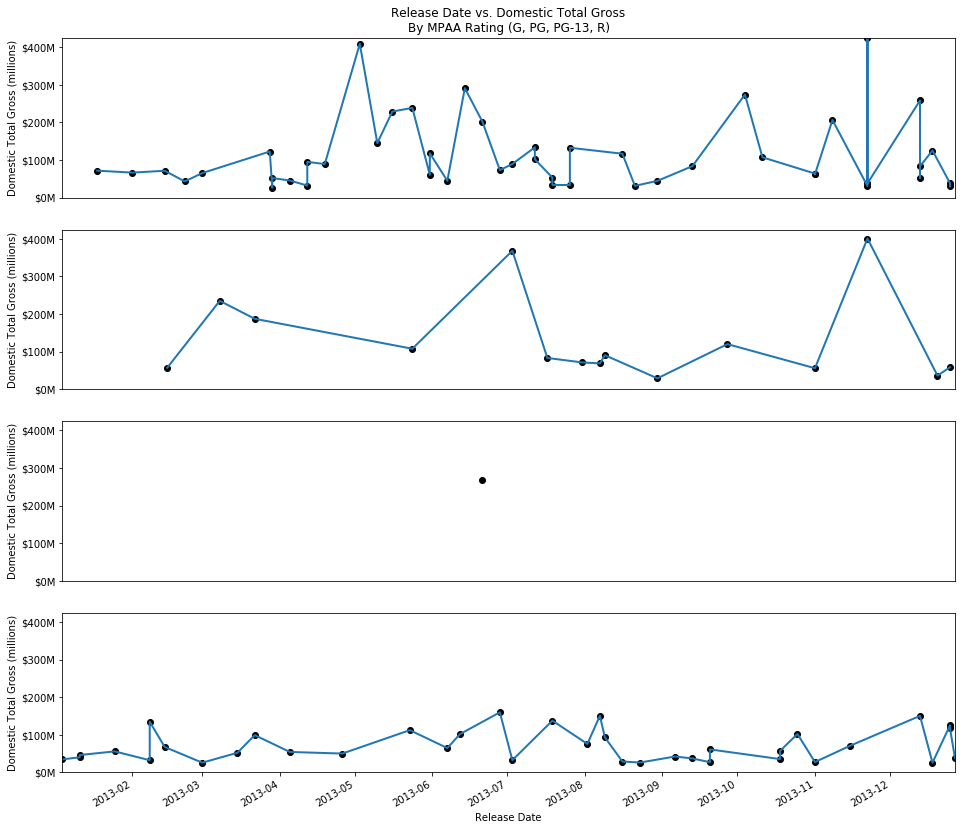

In [6]:
unique_ratings = pd.unique(df['Rating'])
fig, ax = plt.subplots(len(unique_ratings), 1, figsize=(16,15))
for i in range(len(unique_ratings)):
    rating = unique_ratings[i]
    mask = (df['Rating'] == rating)
    ax[i].plot_date(df[mask]['ReleaseDate'], df[mask]['DomesticTotalGross_mil'], 'ko')
    df[mask].plot('ReleaseDate', 'DomesticTotalGross_mil', ax=ax[i], lw=2)
    ax[i].set_xlim(min(df['ReleaseDate']), max(df['ReleaseDate']))
    ax[i].set_ylim(0, max(df['DomesticTotalGross_mil']))
    
    if i == 0:
        ax[i].set_title('Release Date vs. Domestic Total Gross\nBy MPAA Rating (G, PG, PG-13, R)')
    
    if i < len(unique_ratings)-1:
        ax[i].get_xaxis().set_visible(False)
    else:
        ax[i].set_xlabel('Release Date')
    
    ax[i].set_ylabel('Domestic Total Gross (millions)')
    ax[i].legend_.remove()
    fmt = '${x:,.0f}M'
    tick = mtick.StrMethodFormatter(fmt)
    ax[i].yaxis.set_major_formatter(tick) 

## Challenge 5

What director in your dataset has the highest gross per movie?

In [9]:
director_count = df.groupby('Director').count()
director_sum = df.groupby('Director').sum()
director_mean = df.groupby('Director').mean()
director_mean.head()

,Budget,DomesticTotalGross,Runtime,DomesticTotalGross_mil
Director,,,,
Adam McKay,50000000.0,125168368.0,119.0,125.168368
Alan Taylor,170000000.0,206362140.0,120.0,206.362140
Alfonso Cuaron,100000000.0,274092705.0,91.0,274.092705
Andres Muschietti,15000000.0,71628180.0,100.0,71.628180
Andrew Niccol,40000000.0,26627201.0,125.0,26.627201


In [11]:
director_mean['DomesticTotalGross'].sort_values(ascending=False).head()

Director
Francis Lawrence             424668047.0
Shane Black                  409013994.0
Chris BuckJennifer Lee       400738009.0
Pierre CoffinChris Renaud    368061265.0
Zack Snyder                  291045518.0
Name: DomesticTotalGross, dtype: float64

#### ANSWER:

Francis Lawrence has the highest domestic gross per movie, at **$424,668,047**.

## Challenge 6

Bin your dataset into months and make a bar graph of the mean domestic total gross by month. Error bars will represent the standard error of the mean.

Title of graph should include: Mean Domestic Total Gross by Month in 2013

Topic for consideration: what is the correct formula for the standard error of the mean? Examine the error bars and see if they are "reasonable."

In [12]:
df['Month'] = df['ReleaseDate'].apply(lambda x: x.month)
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,DomesticTotalGross_mil,Month
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,424.668047,11
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,409.013994,5
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,400.738009,11
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,368.061265,7
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,291.045518,6


In [15]:
import calendar
by_month = df.groupby('Month').mean()['DomesticTotalGross_mil']
by_month_error = df.groupby('Month')['DomesticTotalGross_mil'].sem()
by_month.index = map(lambda x: calendar.month_abbr[x], by_month.index)
by_month_error.index = map(lambda x: calendar.month_abbr[x], by_month_error.index)
by_month

Jan     49.543237
Feb     67.386014
Mar     96.097096
Apr     60.940720
May    177.409720
Jun    150.650006
Jul    105.780722
Aug     68.531263
Sep     61.712314
Oct    115.027038
Nov    137.936760
Dec     87.483386
Name: DomesticTotalGross_mil, dtype: float64

In [16]:
by_month_error

Jan     6.555914
Feb    12.409272
Mar    24.413139
Apr    10.329106
May    39.518588
Jun    33.658260
Jul    26.387322
Aug    12.459149
Sep    14.216540
Oct    42.012719
Nov    48.572933
Dec    18.537594
Name: DomesticTotalGross_mil, dtype: float64

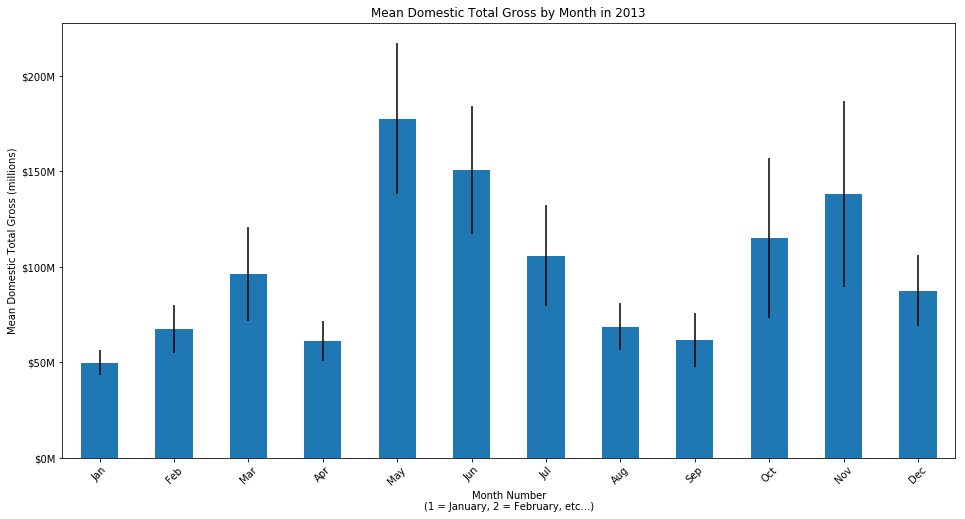

In [17]:
fig, ax = plt.subplots(1,1, figsize=(16,8))
by_month.plot(kind='bar', ax=ax, yerr=by_month_error)

fmt = '${x:,.0f}M'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 
ax.set_xlabel('Month Number\n(1 = January, 2 = February, etc...)')
ax.set_ylabel('Mean Domestic Total Gross (millions)')
ax.set_title('Mean Domestic Total Gross by Month in 2013')

plt.setp( ax.xaxis.get_majorticklabels(), rotation=45 );